In [0]:
#Importing Essential Libraries
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from google.colab import files


#Reading the csv files
TitanicTrain = pd.read_csv("train.csv")
TitanicTest = pd.read_csv("test.csv")

In [0]:
"""Correlation of survival rates with different features
Male survival rate: 18.890814558058924%
Female survival rate: 74.20382165605095%

Class 1 survival rate: 62.96296296296296%
Class 2 survival rate: 47.28260869565217%
Class 3 survival rate: 24.236252545824847%

Cherbourg survival rate: 55.35714285714286%
Queenstown survival rate: 38.961038961038966%
Southampton survival rate: 33.69565217391305%

Kid survival rate: 53.98230088495575%
Young adult survival rate: 38.02083333333333%
Middle Adult survival rate: 40.11299435028249%
OldAdult survival rate: 30.0%

No sibling or spouse survival rate: 34.53947368421053%
Sibling or spouse survival rate: 46.64310954063604%

No parents or children survival rate: 34.365781710914455%
Parents or children survival rate: 51.173708920187785%

First quartile rate: 20.673076923076923%
Second quartile survival rate: 30.357142857142854%
Third quartile survival rate: 44.54148471615721%
Fourth quartile survival rate: 58.108108108108105%"""


#Clean training data
SexList = list(TitanicTrain["Sex"])
ClassList = list(TitanicTrain["Pclass"])
EmbarkedList = list(TitanicTrain["Embarked"])
SurvivalList = list(TitanicTrain["Survived"])
AgeList = list(TitanicTrain["Age"])
SibspList = list(TitanicTrain["SibSp"])
ParchList = list(TitanicTrain["Parch"])
FareList = list(TitanicTrain["Fare"])

for j in range(len(SexList)):
  if SexList[j] == "male" and math.isnan(float(AgeList[j])):
    AgeList[j] = 29.8633222958
  if SexList[j] == "female" and math.isnan(float(AgeList[j])):
    AgeList[j] = 27.4578544061

Train on 891 samples
Epoch 1/50
891/891 [==============================] - 1s 658us/sample - loss: 0.4858 - mean_absolute_error: 0.4858 - mean_squared_error: 0.2385
Epoch 2/50
891/891 [==============================] - 0s 91us/sample - loss: 0.4736 - mean_absolute_error: 0.4736 - mean_squared_error: 0.2296
Epoch 3/50
891/891 [==============================] - 0s 92us/sample - loss: 0.4596 - mean_absolute_error: 0.4596 - mean_squared_error: 0.2215
Epoch 4/50
891/891 [==============================] - 0s 106us/sample - loss: 0.4428 - mean_absolute_error: 0.4428 - mean_squared_error: 0.2147
Epoch 5/50
891/891 [==============================] - 0s 100us/sample - loss: 0.4212 - mean_absolute_error: 0.4212 - mean_squared_error: 0.2082
Epoch 6/50
891/891 [==============================] - 0s 96us/sample - loss: 0.3953 - mean_absolute_error: 0.3953 - mean_squared_error: 0.2024
Epoch 7/50
891/891 [==============================] - 0s 93us/sample - loss: 0.3703 - mean_absolute_error: 0.3703 - me

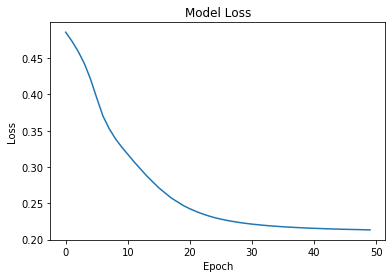

In [0]:
"""Machine learning model to predict whether a passenger survived or not
based on age, class, sex, departure, fare, and parents/children."""


#Label Encoding - converting categorical variables to numerical values
label_encoder = preprocessing.LabelEncoder()
SexList = label_encoder.fit_transform(SexList)
EmbarkedList = label_encoder.fit_transform(EmbarkedList)


#Normalizing training data lists
for c in range(len(SexList)):
  AgeList[c] = (AgeList[c] - min(AgeList)) / (max(AgeList) - min(AgeList))
  ClassList[c] = (ClassList[c] - min(ClassList)) / (max(ClassList) - min(ClassList))
  EmbarkedList[c] = (EmbarkedList[c] - min(EmbarkedList)) / (max(EmbarkedList) - min(EmbarkedList))
  FareList[c] = (FareList[c] - min(FareList)) / (max(FareList) - min(FareList))
  ParchList[c] = (ParchList[c] - min(ParchList)) / (max(ParchList) - min(ParchList))


#Prepare training data
InputTrain = []
OutputTrain = []

for k in range(len(SexList)):
  InputTrain.append([SexList[k], AgeList[k], ClassList[k], EmbarkedList[k], ParchList[k], FareList[k]])
  OutputTrain.append(SurvivalList[k])

InputTrain = np.array(InputTrain)
OutputTrain = np.array(OutputTrain)


#Building the model
model = tf.keras.models.Sequential(
    [layers.Dense(6, input_shape = [6], activation = 'relu'),
    layers.Dense(3, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
    ])

"""12, 6 structure; adam optimizer; 5 epochs; preprocessing.normalized data - 0.62679
12, 6 structure; adam optimizer; 25 epochs; preprocessing.normalized data - 0.62679
20, 17, 12 stucture; adam optimizer; 200 epochs; preprocessing.normalized data - 0.62679
30, 20, 10 structure; adam optimizer; 200 epochs; unnormalized data - 0.71291
24, 20, 16, 12 structure; adam optimizer; 220 epochs; unnormalized data - 0.74641
20, 17, 12 stucture; adam optimizer; 200 epochs; unnormalized data - 0.75598
6, 3 structure; adam optimizer; 50 epochs; min/max normalized data - 0.77033
10, 7 structure; adam optimizer; 100 epochs; min/max normalized data - 0.77511
10, 7, 4 structure; adam optimizer; 115 epochs; min/max normalized data - 0.77990"""


#Compiling the model
model.compile(optimizer = 'adam', loss = 'mae', metrics = ["mae", "mse"])


#Training the model
TrainedModel = model.fit(InputTrain, OutputTrain, epochs = 50)
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(TrainedModel.history["loss"])

In [0]:
#Cleaning testing data
SexList2 = list(TitanicTest["Sex"])
ClassList2 = list(TitanicTest["Pclass"])
EmbarkedList2 = list(TitanicTest["Embarked"])
AgeList2 = list(TitanicTest["Age"])
SibspList2 = list(TitanicTest["SibSp"])
ParchList2 = list(TitanicTest["Parch"])
FareList2 = list(TitanicTest["Fare"])

for a in range(len(SexList2)):
  if SexList2[a] == "male" and math.isnan(float(AgeList2[a])):
    AgeList2[a] = 28.1920456778
  if SexList2[a] == "female" and math.isnan(float(AgeList2[a])):
    AgeList2[a] = 28.3428948706
  if math.isnan(float(FareList2[a])):
    FareList2[a] = 10


#Label Encoding - converting categorical variables to numerical values
label_encoder = preprocessing.LabelEncoder()
SexList2 = label_encoder.fit_transform(SexList2)
EmbarkedList2 = label_encoder.fit_transform(EmbarkedList2)


#Normalizing testing data lists
for d in range(len(SexList2)):
  AgeList2[d] = (AgeList2[d] - min(AgeList2)) / (max(AgeList2) - min(AgeList2))
  ClassList2[d] = (ClassList2[d] - min(ClassList2)) / (max(ClassList2) - min(ClassList2))
  EmbarkedList2[d] = (EmbarkedList2[d] - min(EmbarkedList2)) / (max(EmbarkedList2) - min(EmbarkedList2))
  FareList2[d] = (FareList2[d] - min(FareList2)) / (max(FareList2) - min(FareList2))
  ParchList2[d] = (ParchList2[d] - min(ParchList2)) / (max(ParchList2) - min(ParchList2))


#Preparing testing data
InputTest = []
for b in range(len(SexList2)):
  InputTest.append([SexList2[b], AgeList2[b], ClassList2[b], EmbarkedList2[b], ParchList2[b], FareList2[b]])

InputTest = np.array(InputTest)


#Performing predictions on testing data
predictions = model.predict(InputTest)
RoundedPredictions = [int(abs(round(x[0]))) for x in predictions]
RoundedPredictions = np.array(RoundedPredictions)
RoundedPredictions = RoundedPredictions.reshape(-1,1)


#Storing predictions in a csv file
PredictDataSet = pd.DataFrame(np.concatenate([TitanicTest[["PassengerId"]].values, RoundedPredictions], axis = 1), columns = ['PassengerId','Survived'])
PredictDataSet.to_csv('submission.csv', index = False)
files.download('submission.csv')